In [14]:
from google.colab import files
uploaded = files.upload()


Saving marketing_campaign.csv to marketing_campaign (3).csv


In [16]:
import pandas as pd


In [19]:
# Load the dataset with tab separator
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')

# Display the first few rows to check the structure
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [20]:
# Check the first few rows
df.head()

# Check the data types
df.dtypes

# Check for any missing values
df.isnull().sum()


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [26]:
# Fill missing values in the 'Income' column with the median
df['Income'] = df['Income'].fillna(df['Income'].median())

# Check if missing values are filled
df.isnull().sum()


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [27]:
# Check for duplicates
df.duplicated().sum()

# Remove duplicates if any
df = df.drop_duplicates()

# Verify if duplicates were removed
df.duplicated().sum()


np.int64(0)

In [28]:
# Standardize text columns by converting to lowercase and stripping extra spaces
df['Education'] = df['Education'].str.lower().str.strip()
df['Marital_Status'] = df['Marital_Status'].str.lower().str.strip()

# Verify the changes
df[['Education', 'Marital_Status']].head()


,Education,Marital_Status
0,graduation,single
1,graduation,single
2,graduation,together
3,graduation,together
4,phd,married


In [30]:
# Rename columns to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Verify the changes
df.columns



Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

In [31]:
# Check data types of all columns
df.dtypes


,0
id,int64
year_birth,int64
education,object
marital_status,object
income,float64
kidhome,int64
teenhome,int64
dt_customer,object
recency,int64
mntwines,int64


In [33]:
# Convert 'dt_customer' to datetime with dayfirst=True to handle the format correctly
df['dt_customer'] = pd.to_datetime(df['dt_customer'], dayfirst=True)

# Verify the change
df.dtypes


,0
id,int64
year_birth,int64
education,object
marital_status,object
income,float64
kidhome,int64
teenhome,int64
dt_customer,datetime64[ns]
recency,int64
mntwines,int64


In [34]:
df.describe()  # This will give you the summary statistics of the numerical columns


,id,year_birth,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


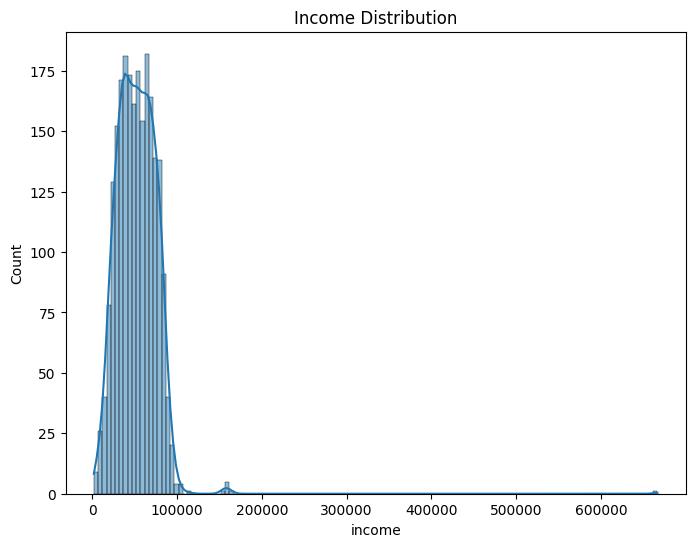

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'Income'
plt.figure(figsize=(8, 6))
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns


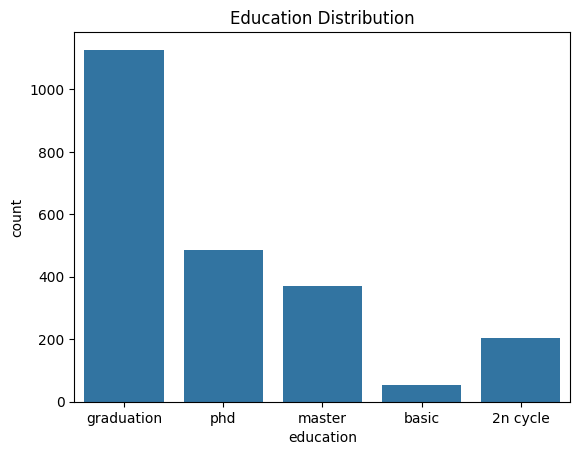

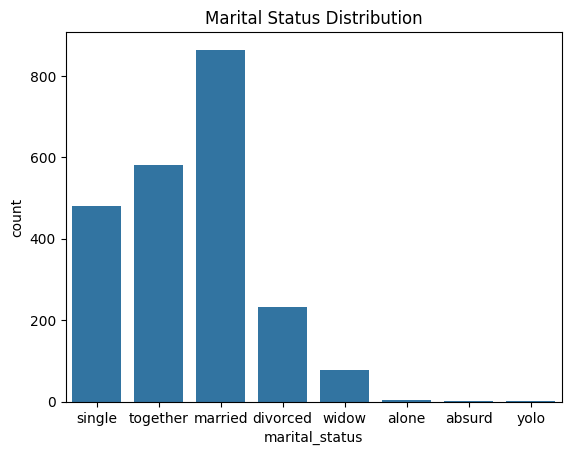

In [38]:
sns.countplot(data=df, x='education')
plt.title('Education Distribution')
plt.show()

sns.countplot(data=df, x='marital_status')
plt.title('Marital Status Distribution')
plt.show()


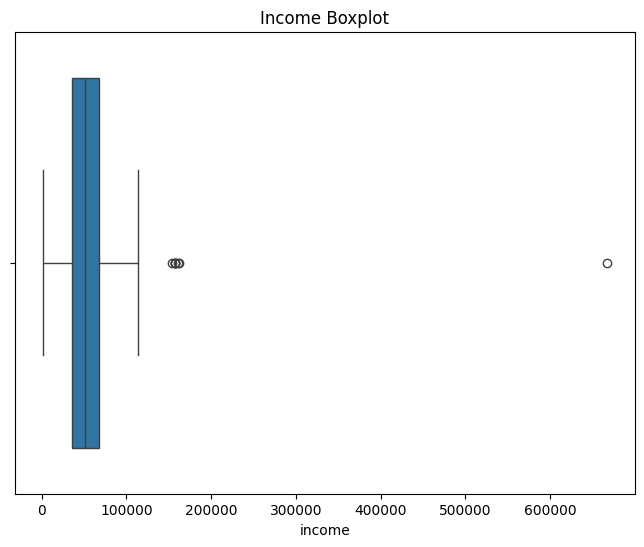

In [46]:
# Boxplot for 'Income'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['income'])
plt.title('Income Boxplot')
plt.show()
